## Import Library

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error

## Read Dataset

In [2]:
df = pd.read_excel('dataset/dataset_klasifikasi.xlsx') #membaca dataset
df

,Bulan/Tahun,2019,2020,2021,Total/Kg
0,Januari,135430,128530,131350,395310
1,Februari,110440,121890,154510,386840
2,Maret,69140,77770,156250,303160
3,April,131610,111440,158230,401280
4,Mei,145190,63810,127830,336830
5,Juni,137000,109890,180720,427610
6,Juli,97950,123060,96890,317900
7,Agustus,113660,120750,155320,389730
8,September,143200,126760,165290,435250
9,Oktober,70980,105990,143700,320670


## Cek Missing Values

In [3]:
df.isna().sum() 

Bulan/Tahun    0
2019           0
2020           0
2021           0
Total/Kg       0
dtype: int64

## Data Korelasi

In [4]:
df.corr()

,2019,2020,2021,Total/Kg
2019,1.000000,0.073156,0.137083,0.695170
2020,0.073156,1.000000,0.100794,0.586108
2021,0.137083,0.100794,1.000000,0.615849
Total/Kg,0.695170,0.586108,0.615849,1.000000


## Inisiasi X dan y

In [5]:
X = df.drop(columns=['Bulan/Tahun','Total/Kg'])
y = df['Total/Kg']
X

,2019,2020,2021
0,135430,128530,131350
1,110440,121890,154510
2,69140,77770,156250
3,131610,111440,158230
4,145190,63810,127830
5,137000,109890,180720
6,97950,123060,96890
7,113660,120750,155320
8,143200,126760,165290
9,70980,105990,143700


## Split Dataset

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.1)
y_test

6     317900
11    337600
Name: Total/Kg, dtype: int64

## Model Backpropagation 

In [7]:
mdl = tf.keras.models.Sequential() #backpropagation
mdl.add(tf.keras.layers.Dense(units=4,activation='relu',input_shape=(3,)))#input layer ada 3 node karena variabel input ada 4
mdl.add(tf.keras.layers.Dense(units=1))#hiden layer ada 1 node
mdl.compile(loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(0.1))
mdl.fit(X_train,y_train,epochs=100,batch_size=128) #melakukan training

Epoch 1/100


2022-08-16 23:17:56.714450: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-16 23:17:56.746338: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-16 23:17:56.746550: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-16 23:17:56.747020: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

1/1 [==============================] - 1s 584ms/step - loss: 371696.3125
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 290195.5625
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 225069.5938
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 169265.4062
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 109070.7109
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 41031.5195
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 35084.7539
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 75430.6953
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 88124.5938
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 80615.8359
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 58827.9180
Epoch 12/100
1/1 [==============================] - 0s 4ms/step - loss: 27333.5840
Epoch 13/100
1/1 [

## Info Model

In [8]:
mdl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 16        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


## Prediksi

In [20]:
X_train

,2019,2020,2021,Aktual,Prediksi,Error
4,145190,63810,127830,336830,338175,1345
10,94970,126030,158000,379000,377824,1175
2,69140,77770,156250,303160,303815,655
8,143200,126760,165290,435250,434646,603
1,110440,121890,154510,386840,385911,928
7,113660,120750,155320,389730,388898,831
9,70980,105990,143700,320670,319836,833
3,131610,111440,158230,401280,401084,195
0,135430,128530,131350,395310,393815,1494
5,137000,109890,180720,427610,428022,412


In [10]:
predic = mdl.predict(X_train)
predic

array([[338175.06],
       [377824.56],
       [303815.94],
       [434646.2 ],
       [385911.56],
       [388898.72],
       [319836.25],
       [401084.22],
       [393815.72],
       [428022.97]], dtype=float32)

In [11]:
y_train

4     336830
10    379000
2     303160
8     435250
1     386840
7     389730
9     320670
3     401280
0     395310
5     427610
Name: Total/Kg, dtype: int64

## Visualisasi Hasil

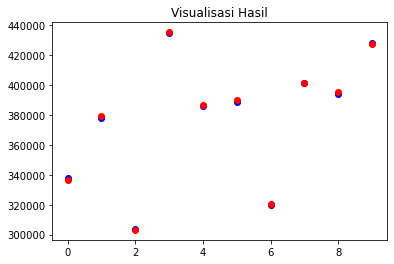

In [12]:
import matplotlib.pyplot as plt
a = range(len(y_train))
plt.scatter(a,predic,color='blue')
plt.scatter(a,y_train,color='red')
plt.title('Visualisasi Hasil')
plt.show()

## Persentase Error

In [36]:
j = 0
hasil_error = []
selisih = []
for i in y_train:
    err_per = mean_absolute_percentage_error([i],[predic[j]])
    err = mean_absolute_error([i],[predic[j]])
    selisih.append(int(err))
    # print(int(a))
    a = err_per*100
    hasil_error.append(f'{a}%')
    j += 1
hasil_error

['0.3993297806014904%',
 '0.31014182058047496%',
 '0.2163667700224304%',
 '0.13872774267662263%',
 '0.24000555785337607%',
 '0.2132967054114387%',
 '0.26000249477656157%',
 '0.048789187101275916%',
 '0.37800239052895196%',
 '0.09657602722106592%']

## Export Hasil Berupa Excel

In [37]:
X_train['Aktual'] = y_train
X_train['Prediksi'] = predic.astype('int')
X_train['Error'] = hasil_error
X_train['Selisih'] = selisih
X_train.to_excel('Hasil BPNN.xlsx',index=False)

## Selesai